In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

import warnings
warnings.filterwarnings("ignore")


## **Data Exploration and Preprocessing**

In [208]:
df=pd.read_csv("/content/Alphabets_data.csv")

In [209]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [210]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [212]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [213]:
le=LabelEncoder()
df["letter"]=le.fit_transform(df["letter"])

In [214]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [215]:
df["letter"].value_counts()


,count
letter,
20,813
3,805
15,803
19,796
12,792
0,789
23,787
24,786
13,783


<Axes: xlabel='letter', ylabel='count'>

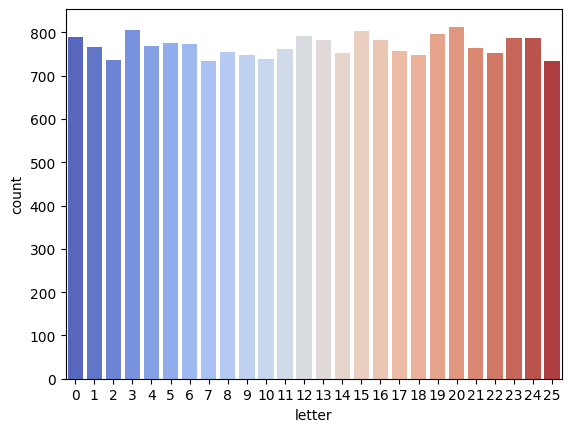

In [216]:
sns.countplot(x="letter",data=df,palette='coolwarm')

In [217]:
x=df.drop("letter",axis=1)
y=df["letter"]

In [218]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [219]:
y

,letter
0,19
1,8
2,3
3,13
4,6
...,...
19995,3
19996,2
19997,19
19998,18


In [220]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [221]:
x=pd.DataFrame(x1,columns=x.columns)
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354
19996,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354
19997,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149
19998,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911


In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [223]:
x_train

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
5894,-0.012309,-0.010743,-0.060486,-0.164704,0.225598,-0.443044,-0.215220,-0.603207,0.765028,1.092242,0.587608,0.514764,-0.019764,-0.219082,0.120081,0.122911
3728,-0.012309,-0.010743,0.435910,-0.164704,0.682135,-0.443044,0.214833,-0.603207,0.765028,1.092242,0.587608,0.514764,-0.019764,-0.219082,0.120081,-0.495354
8958,-0.535004,-0.615983,-0.556881,-1.049137,-0.230939,0.050543,0.214833,0.137561,-0.075039,-0.515208,0.207525,-0.927151,0.837691,0.427463,-0.659036,-1.113619
7671,-0.012309,0.897117,0.435910,0.719730,1.138672,-0.936631,-0.215220,0.137561,0.765028,-0.917071,-0.172558,1.956678,-0.019764,-0.219082,0.899198,0.741176
5999,-0.012309,0.897117,0.435910,1.161947,0.225598,0.544130,1.504991,-0.973591,-0.915106,-1.720796,1.347774,0.514764,-0.019764,1.720552,-1.048594,0.122911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.510385,1.199738,-0.556881,0.277513,-0.230939,0.050543,-0.215220,-0.232823,-0.915106,0.288517,-0.172558,-0.446513,-0.019764,1.074008,1.678316,-0.495354
11964,-0.535004,-0.010743,-0.060486,-0.164704,0.225598,1.037718,1.504991,0.507945,-0.495072,-0.917071,-0.552641,-0.446513,-0.448492,-0.219082,0.899198,-2.350149
5390,-0.535004,-0.918603,0.435910,-1.049137,-0.687476,1.037718,-0.645273,-0.973591,1.185061,0.690380,-1.312807,-0.446513,-0.448492,-0.865626,-0.269477,0.741176
860,-0.535004,0.291877,-0.556881,0.277513,-0.687476,0.050543,0.214833,-1.714360,1.185061,2.297830,-0.172558,-0.927151,-1.305948,-0.219082,-1.048594,-0.495354


In [224]:
x_test

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
10650,-0.535004,-0.313363,-0.060486,0.277513,0.225598,-0.443044,-0.215220,-0.603207,1.185061,-0.113345,-0.172558,0.514764,-0.019764,-0.865626,1.288757,-1.113619
2041,-0.012309,1.199738,0.435910,1.161947,2.051746,0.050543,0.214833,-0.603207,-0.075039,-0.917071,-0.172558,0.995402,1.266419,1.720552,1.288757,-1.731884
8668,-0.535004,-0.918603,-0.060486,-1.049137,-0.687476,1.531305,-2.365484,-0.973591,-1.755172,0.288517,-1.692890,0.514764,-0.448492,-1.512171,-0.659036,0.122911
1114,-1.057698,-0.918603,-1.549672,-1.049137,-0.687476,0.050543,-0.215220,0.137561,0.765028,-0.515208,-0.172558,0.034125,-0.448492,-0.219082,0.509640,1.359441
13902,-0.012309,-0.615983,-0.060486,0.719730,-0.230939,0.544130,-0.215220,1.248713,0.344994,-0.917071,0.207525,0.514764,-0.019764,-0.219082,0.509640,0.741176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,-0.012309,-0.010743,0.435910,-0.164704,1.595209,-0.443044,-0.645273,-0.603207,-1.335139,-0.113345,-0.172558,-0.446513,-0.019764,-0.865626,2.846991,-3.586678
7442,-1.057698,-1.826464,-1.053277,-1.049137,-1.144013,-0.443044,1.935044,-0.603207,0.344994,-0.113345,1.727857,-0.446513,-0.877220,1.720552,-1.048594,-0.495354
9999,0.510385,0.897117,0.932305,1.604164,0.225598,0.544130,-1.075326,1.619097,1.185061,-1.318933,-0.932724,0.034125,-0.019764,-0.219082,0.120081,0.122911
1870,-0.012309,-0.615983,-0.060486,0.719730,0.682135,1.531305,1.504991,0.137561,-0.495072,-1.318933,0.587608,0.034125,0.837691,1.074008,2.067874,-1.731884


In [225]:
y_train

,letter
5894,4
3728,4
8958,13
7671,10
5999,21
...,...
11284,6
11964,25
5390,23
860,8


In [226]:
y_test

,letter
10650,19
2041,11
8668,0
1114,4
13902,16
...,...
4073,18
7442,19
9999,16
1870,24


In [227]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

## **Model Implementation**

In [184]:
model=Sequential()
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(y_train_cat.shape[1],activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train_cat,epochs=100,batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2727 - loss: 2.6036 - val_accuracy: 0.6931 - val_loss: 1.1383
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7238 - loss: 0.9915 - val_accuracy: 0.7672 - val_loss: 0.8332
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7741 - loss: 0.7738 - val_accuracy: 0.8016 - val_loss: 0.7021
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8101 - loss: 0.6490 - val_accuracy: 0.8200 - val_loss: 0.6218
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.5623 - val_accuracy: 0.8350 - val_loss: 0.5567
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8458 - loss: 0.5136 - val_accuracy: 0.8516 - val_loss: 0.5019
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8618 - loss: 0.4705 - val_accuracy: 0.8619 - val_loss: 0.4693
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8753 - loss: 0.4313 - val_accu

In [185]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

In [186]:
test_loss,test_accuracy

(0.2159062623977661, 0.9390000104904175)

In [187]:
ypred=model.predict(x_test)
ypred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[3.9732159e-12, 1.0082678e-05, 1.3944725e-15, ..., 7.9184443e-01,
        4.3597936e-10, 3.5829559e-02],
       [7.2469483e-13, 1.5298978e-16, 4.8042736e-11, ..., 7.2580747e-08,
        5.1671422e-13, 2.3387374e-19],
       [9.9999994e-01, 1.2940776e-28, 1.7693649e-24, ..., 1.1724460e-22,
        3.3006452e-31, 2.5964991e-27],
       ...,
       [3.8733559e-15, 9.6153031e-27, 5.7006128e-10, ..., 4.0637816e-15,
        1.7717796e-26, 8.0505162e-19],
       [6.0973032e-10, 4.6428359e-16, 8.1921473e-26, ..., 2.5070551e-12,
        9.9997121e-01, 1.3994351e-08],
       [2.4659030e-21, 8.7494711e-33, 3.6570786e-31, ..., 9.3412064e-16,
        9.9999994e-01, 4.5400223e-37]], dtype=float32)

In [188]:

ypred = np.argmax(ypred, axis=1)
ypred

array([23, 11,  0, ..., 16, 24, 24])

In [189]:
ypred=pd.DataFrame(ypred,columns=["Exited"])
ypred

,Exited
0,23
1,11
2,0
3,4
4,16
...,...
3995,18
3996,19
3997,16
3998,24


In [190]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       149
           1       0.93      0.90      0.91       153
           2       0.94      0.92      0.93       137
           3       0.96      0.93      0.94       156
           4       0.88      0.95      0.91       141
           5       0.89      0.96      0.92       140
           6       0.96      0.89      0.93       160
           7       0.87      0.85      0.86       144
           8       0.96      0.92      0.94       146
           9       0.93      0.95      0.94       149
          10       0.86      0.91      0.88       130
          11       0.94      0.97      0.96       155
          12       0.95      0.98      0.96       168
          13       0.95      0.93      0.94       151
          14       0.92      0.97      0.95       145
          15       0.99      0.91      0.95       173
          16       0.99      0.92      0.95       166
          17       0.87    

In [191]:
pd.crosstab(y_test,ypred["Exited"])

Exited,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
letter,,,,,,,,,,,,,,,,,,,,,
0,3,1,0,0,0,1,1,3,1,0,...,0,3,1,3,1,1,2,1,1,0
1,0,2,2,2,0,3,1,1,0,1,...,2,2,1,2,0,1,1,1,3,2
2,0,0,0,1,0,2,1,3,1,3,...,0,0,0,1,3,4,1,0,1,1
3,2,2,0,1,2,0,1,0,2,3,...,1,0,2,0,0,1,0,3,1,4
4,1,0,1,1,2,1,0,0,0,1,...,0,1,2,1,1,1,0,1,1,0
5,0,0,1,0,1,1,0,2,1,0,...,1,2,3,0,0,1,1,0,0,0
6,0,0,0,2,0,2,1,1,3,0,...,1,2,2,1,2,0,1,4,2,1
7,0,0,1,2,2,1,2,0,0,0,...,1,0,4,2,5,1,1,1,4,2
8,3,3,1,1,1,1,0,2,1,0,...,0,1,0,3,0,2,1,1,5,2


## **hyper parameter tuning**

In [192]:
# hyper parameter tuning

!pip install -U keras-tuner

In [193]:
import keras_tuner as kt

In [194]:
def hyper(hp):
  model=Sequential()
# input layers
  model.add(Dense(hp.Int("units0",min_value=8,max_value=128,step=8),
                  activation=hp.Choice("activation0",values=["relu","tanh","sigmoid"]),
                  input_dim=16))
  # additional hidden layers
  for i in range(1,hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                  activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))
  # output layer
  model.add(Dense(y_train_cat.shape[1], activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model


In [195]:
tuner=kt.RandomSearch(
    hyper,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3

)

Reloading Tuner from ./untitled_project/tuner0.json


In [196]:
tuner.search(x_train,y_train_cat,epochs=5,validation_split=0.2, verbose=1,validation_data=(x_test,y_test_cat))

In [197]:
tuner.get_best_hyperparameters()[0].values

{'units0': 24,
 'activation0': 'sigmoid',
 'num_layers': 2,
 'learning_rate': 0.01,
 'units1': 8,
 'activation1': 'relu'}

In [198]:
tuned_model=tuner.get_best_models(num_models=1)[0]

In [199]:
tuned_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7870 - loss: 0.6978 - val_accuracy: 0.7933 - val_loss: 0.6861
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8009 - loss: 0.6605 - val_accuracy: 0.7922 - val_loss: 0.6608
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7979 - loss: 0.6533 - val_accuracy: 0.7933 - val_loss: 0.6584
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8028 - loss: 0.6365 - val_accuracy: 0.8145 - val_loss: 0.6256
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8096 - loss: 0.6267 - val_accuracy: 0.8117 - val_loss: 0.6149
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8129 - loss: 0.6003 - val_accuracy: 0.8173 - val_loss: 0.6003
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8300 - loss: 0.5626 - val_accuracy: 0.8245 - val_loss: 0.5843
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8280 - loss: 0.5714 - val_accuracy: 0.

In [200]:
pred1=tuned_model.predict(x_test)
pred1

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.1921031e-07, 2.2971049e-05, 1.0763568e-04, ..., 4.7353947e-01,
        8.8272685e-07, 9.2059355e-03],
       [1.8636078e-03, 1.6725047e-01, 3.8104840e-03, ..., 6.8609439e-02,
        4.0615225e-05, 3.3783313e-06],
       [9.9281448e-01, 9.0553381e-18, 4.9441466e-14, ..., 2.4226733e-04,
        1.1403994e-11, 5.9139452e-08],
       ...,
       [4.7524328e-08, 5.0413794e-19, 1.2137285e-08, ..., 3.8087290e-08,
        9.3244853e-18, 5.2551671e-16],
       [1.1993682e-02, 3.4563418e-04, 1.8226752e-05, ..., 2.0737953e-03,
        4.8545611e-01, 9.5547289e-03],
       [5.7301594e-17, 2.1249552e-24, 3.6601421e-08, ..., 7.4240647e-10,
        9.9931902e-01, 8.3304767e-22]], dtype=float32)

In [201]:
pred1=np.argmax(pred1,axis=1)

In [202]:
pred1

array([23,  4,  0, ..., 16, 24, 24])

In [203]:
pred1=pd.DataFrame(pred1,columns=["Exited"])
pred1

,Exited
0,23
1,4
2,0
3,4
4,16
...,...
3995,25
3996,19
3997,16
3998,24


In [204]:
training_loss,training_accuracy=tuned_model.evaluate(x_train,y_train_cat)
training_loss,training_accuracy

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8552 - loss: 0.4627


(0.4617260992527008, 0.8560624718666077)

In [205]:
testing_loss,testing_accuracy=tuned_model.evaluate(x_test,y_test_cat)
testing_loss,testing_accuracy

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.5017


(0.5046467781066895, 0.8487499952316284)

In [206]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.78      0.88      0.83       153
           2       0.92      0.64      0.76       137
           3       0.82      0.87      0.84       156
           4       0.77      0.84      0.81       141
           5       0.88      0.74      0.80       140
           6       0.70      0.83      0.76       160
           7       0.72      0.71      0.72       144
           8       0.92      0.83      0.87       146
           9       0.86      0.90      0.88       149
          10       0.81      0.84      0.83       130
          11       0.92      0.85      0.88       155
          12       0.94      0.95      0.94       168
          13       0.91      0.87      0.89       151
          14       0.74      0.88      0.81       145
          15       0.85      0.90      0.87       173
          16       0.87      0.86      0.87       166
          17       0.75    